In [1]:
# header for 2018-1 kernel
from pyCHX.chx_packages import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams.update({ 'image.origin': 'lower'   })
plt.rcParams.update({ 'image.interpolation': 'none'   })
import pickle as cpk
from pyCHX.chx_xpcs_xsvs_jupyter_V1 import *
#%run /home/yuzhang/pyCHX_link/pyCHX/chx_generic_functions.py
%matplotlib inline

In [2]:
# import database -> should be hidden from user in same package....
import datetime
import pymongo  
from bson import ObjectId
import matplotlib.patches as mpatches
from IPython.display import clear_output
cli = pymongo.MongoClient('xf11id-ca')    
samples_2 = cli.get_database('samples').get_collection('samples_2')
data_acquisition_collection = cli.get_database('samples').get_collection('data_acquisition_collection')
from databroker import Broker                                                   
db = Broker.named('temp')  # for real applications, 'temp' would be 'chx' 
print('available databases:')
print(cli.database_names())
print('\n available collection in database samples:')
print(cli.samples.collection_names())

available databases:
['amostra', 'chx-simulation-assetstore', 'chx-simulation-metadatastore', 'datastore', 'filestore', 'local', 'metadatastore', 'metadatastore-production-v1', 'samples']

 available collection in database samples:
['samples', 'data_acquisition_collection', 'samples_2', 'debug', 'beamline_pos']


/opt/conda_envs/analysis-2019-1.2-chx/lib/python3.6/site-packages/ipykernel_launcher.py:13: DeprecationWarning: database_names is deprecated. Use list_database_names instead.
  del sys.path[0]
/opt/conda_envs/analysis-2019-1.2-chx/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: collection_names is deprecated. Use list_collection_names instead.
  from ipykernel import kernelapp as app


In [3]:
%run -i /nsls2/xf11id1/analysis/2018_3/commissioning/debug_dataacq.py

In [4]:
# JUST FOR TESTING: clear collection:
#samples_2.delete_many({})
#x=samples_2.insert_one(sam)
#x.acknowledged
#print(x.inserted_id)
#samples_2.find_one({'_id':x.inserted_id})
#data_acquisition_collection = cli.get_database('samples').get_collection('data_acquisition_collection')

# template for sample database entry:

In [ ]:
# explanation of available holders and their parameters:
#['flat_cell',1.5,1.]   -> flat cell holder, R=1.5mm clear aperture (fixed design), sample thickness \n
#['capillary',1.0,[-4,-1],'horizontal']   -> glass capillary, diameter, [useful area min|max, relative to center of holder (mark), orientation: 'vertical' for multi sample holder, 'horizontal for sample chamber']

### Here is an example for creating one sam

In [112]:
sam = {
    'sample':{
        'sample name':'EG-CNC4-noGel',   # mandatory field
        'label':'S18',       # label on sample cell, 'none' if sample is provided to BL 'unmounted' 
        # standards for automated data acquisition: 'flat_cell', 'capillary', 'none' if sample is provided to BL 'unmounted' 
        #'holder':['flat_cell', 1.0,  2.0  ],    #-> flat cell holder, R=1.5mm clear aperture (fixed design), sample thickness \n
        'holder':['capillary',1, [-3,3],'vertical'],  # diameter, [useful area min|max, relative to center of holder (mark),
        'concentration wt%': 4.0,  #weight faction
        'solvent': 'ethylene glycol',
        'size': 'approx. 200 x 10 nm',
        'material': 'Cellulose',
        'dummy':1,
    },
    'info':{
        'owner':'Trosen',                            # mandatory field
        'date entered': str(datetime.datetime.now()),
        'new_spot_method':'random',               #'none' (let BL staff decide, recommended for underfilled capillaries), 'from_center' (use points closest to center), 'consecutive' (just go though the list), 'random' (recommended for samples with micro-bubbles), 'static (will not use fresh spot)'    '
        'uids':{},                                    # will be added automatically         
        'points':[],                                    # will be added later
        'timestamp':datetime.datetime.now()             # this one is not nice to read, but searchable...
    }
}

# Add sample to database:

In [113]:
obid=sample_to_database(sam)


Information successfully added to database!
New database key added: 5cdb0991f4fa2d46d7846f57
New database entry:

{'_id': ObjectId('5cdb0991f4fa2d46d7846f57'), 'sample': {'sample name': 'EG-CNC4-noGel', 'label': 'S18', 'holder': ['capillary', 1, [-3, 3], 'vertical'], 'concentration wt%': 4.0, 'solvent': 'ethylene glycol', 'size': 'approx. 200 x 10 nm', 'material': 'Cellulose', 'dummy': 1}, 'info': {'owner': 'Trosen', 'date entered': '2019-05-14 14:31:42.333731', 'new_spot_method': 'random', 'uids': {}, 'points': [], 'timestamp': datetime.datetime(2019, 5, 14, 14, 31, 42, 333000)}}
5cdb0991f4fa2d46d7846f57


In [114]:
obid

ObjectId('5cdb0991f4fa2d46d7846f57')

In [ ]:
#add_sampling_grid(obid)
#add_sampling_grid(obid,interactive=True)

sample holder: capillary
step size x: 0.05   step size y: 0.05   number of points available: 491


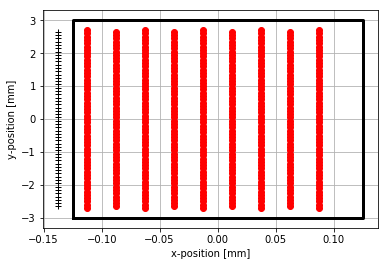

In [115]:
#add_sampling_grid(obid)
add_sampling_grid(obid,interactive=False,x_step=0.05, y_step=0.05, 
                  holder= ['capillary',1, [-3,3],'vertical'] )
                  #holder = ['flat_cell',1.0, 2.0] )
                 # holder= ['capillary',1, [-5,5],'vertical']  )


In [40]:
#obid = ObjectId('5bc77d71412c27b926e790ee')
#add_new_spot_method(obid)

In [14]:
#S1 ObjectId('5cdb0756f4fa2d46d7846f46')
#S2 ObjectId('5cdb07d6f4fa2d46d7846f47')
#S3 ObjectId('5cdb0821f4fa2d46d7846f48')
#S4 ObjectId('5cdb084bf4fa2d46d7846f49')
#S5 ObjectId('5cdb0861f4fa2d46d7846f4a')
#S6 ObjectId('5cdb0884f4fa2d46d7846f4b')
#S7 ObjectId('5cdb089af4fa2d46d7846f4c')
#S8 ObjectId('5cdb08aef4fa2d46d7846f4d')
#S9 ObjectId('5cdb08c3f4fa2d46d7846f4e')
#S10 ObjectId('5cdb08d5f4fa2d46d7846f4f')
#S11 ObjectId('5cdb08ebf4fa2d46d7846f50')
#S12 ObjectId('5cdb0905f4fa2d46d7846f51')
#S13 ObjectId('5cdb0919f4fa2d46d7846f52')
#S14 ObjectId('5cdb0933f4fa2d46d7846f53')
#S15 ObjectId('5cdb0957f4fa2d46d7846f54')
#S16 ObjectId('5cdb0968f4fa2d46d7846f55')
#S17 ObjectId('5cdb097bf4fa2d46d7846f56')
#S18 ObjectId('5cdb0991f4fa2d46d7846f57')
#S19  ObjectId('5cdb00aaf4fa2d46d7846f44')




# End of userdata entry to database
# How to Find samples in database: Search examples

In [116]:
search_sample_database({'info.owner':'Trosen'},show_points=False) # search by owner 
#search_sample_database({'info.owner':'ChengHungLin'},show_points=False) # search by owner 


Found 20 database entries for filter: {'info.owner': 'Trosen'}

{'_id': ObjectId('5cdafc8af4fa2d46d7846f43'), 'sample': {'sample name': 'EG-CNC8-noGel', 'label': 'S19', 'holder': ['capillary', 1, [-3, 3], 'vertical'], 'concentration wt%': 8.0, 'solvent': 'ethylene glycol', 'size': 'approx. 200 x 10 nm', 'material': 'Cellulose'}, 'info': {'owner': 'Trosen', 'date entered': '2019-05-14 13:36:07.756906', 'new_spot_method': 'random', 'uids': {}, 'timestamp': datetime.datetime(2019, 5, 14, 13, 36, 7, 756000)}}

{'_id': ObjectId('5cdb00aaf4fa2d46d7846f44'), 'sample': {'sample name': 'EG-CNC8-noGel', 'label': 'S19', 'holder': ['capillary', 1, [-3, 3], 'vertical'], 'concentration wt%': 8.0, 'solvent': 'ethylene glycol', 'size': 'approx. 200 x 10 nm', 'material': 'Cellulose', 'dummy': 1}, 'info': {'owner': 'Trosen', 'date entered': '2019-05-14 13:53:43.716020', 'new_spot_method': 'random', 'uids': {}, 'timestamp': datetime.datetime(2019, 5, 14, 13, 53, 43, 716000)}}

{'_id': ObjectId('5cdb0756f

In [117]:
#search_sample_database({ "$and": [ { 'sample.sample name': { "$ne": 'Some liquid' } }, { 'sample.label': { "$exists": False } } ] }) # Search for sample name NOT 'Some liquid' AND the key 'label' exists 

In [ ]:
#search_sample_database({"$and": [{'info.owner':'lwiegart'},{'sample.sample name':{'$regex':'rubber'}}]})  # search for: owner = lwiegart & sample name contains 'rubber'

In [ ]:
# search for entries made between two time points.
# Note: search is on 'timestamp' NOT on 'date entered' ('date entered' is a string that's nice to read, but not to search...)
start = datetime.datetime(2018, 8, 31, 12, 51, 4)
end = datetime.datetime(2018, 8, 31, 15, 52, 4)
print('searching for database entries from '+str(start)+' to '+ str(end))
search_sample_database({'$and': [{'info.timestamp':{'$lt': end, '$gte': start}},{'sample.sample name':{'$regex':'rubber'}}]}) 

In [ ]:
search_sample_database({"$or": [{'info.owner': {'sample.sample name':'ice cream'}},{'sample.holder':'flat_cell'}]}) #search for sample name 'ice cream' OR sample.holder 'flat_cell'

### How to find and delete

In [118]:
if False:
    pass
    #samples_2.find_one( {'info.owner':'chx'} )
    #samples_2.find_one_and_delete(    {'info.owner':'chx'}  )
    #samples_2.find_one_and_delete(    {'info.owner':'chx'}  )


In [ ]:
#obj = ObjectId('5bbf68be412c273ebb3672e0')
#samples_2.find_one_and_delete( { '_id': ObjectId('5bbe3db2412c278b1521fbb0') } )
#samples_2.find_one_and_delete( { '_id':   obj } )


# end of search examples

# Set up (multi) sample mount and define data acquisition for each sample:

## Here is an example for creating multi samples

In [120]:
multi_sample={
    
    'sample_mount':'multi',
    'owner':'chx',
    
     'slot2':{
        'sample_id': ObjectId('5cdb0756f4fa2d46d7846f46'),
        # SAMPLE S1
        #'data_acq_seq':myfunc
        'data_series':{ 
            
                'fast_T1':  ['4m',.00134,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T2':  ['4m',.00134,1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T3':  ['4m',.00134,1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T4':  ['4m',.00134,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
                'medium_T1':  ['4m',.01,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T2':  ['4m',.01, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T3':  ['4m',.01, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T4':  ['4m',.01,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
            
                'slow_T1':  ['4m',.1,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T2':  ['4m',.1, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T3':  ['4m',.1, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T4':  ['4m',.1,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                     
                      },
        'data_acq_seq':{'1':[2,'fast_T1', 'fast_T2', 'fast_T3','fast_T4',
                               'medium_T1', 'medium_T2','medium_T3','medium_T4',
                             'slow_T1', 'slow_T2', 'slow_T3', 'slow_T4',                              
                            ],
                       }
     },
    
     'slot3':{
        'sample_id': ObjectId('5cdb07d6f4fa2d46d7846f47'),
        # SAMPLE S2
        #'data_acq_seq':myfunc
        'data_series':{ 
            
                'fast_T1':  ['4m',.00134,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T2':  ['4m',.00134,1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T3':  ['4m',.00134,1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T4':  ['4m',.00134,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
                'medium_T1':  ['4m',.01,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T2':  ['4m',.01, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T3':  ['4m',.01, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T4':  ['4m',.01,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
            
                'slow_T1':  ['4m',.1,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T2':  ['4m',.1, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T3':  ['4m',.1, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T4':  ['4m',.1,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                     
                      },
        'data_acq_seq':{'1':[2,'fast_T1', 'fast_T2', 'fast_T3','fast_T4',
                               'medium_T1', 'medium_T2','medium_T3','medium_T4',
                             'slow_T1', 'slow_T2', 'slow_T3', 'slow_T4',                              
                            ],
                       }
     },
    
     'slot4':{
        'sample_id': ObjectId('5cdb0821f4fa2d46d7846f48'),
        # SAMPLE S3
        #'data_acq_seq':myfunc
        'data_series':{ 
            
                'fast_T1':  ['4m',.00134,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T2':  ['4m',.00134,1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T3':  ['4m',.00134,1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T4':  ['4m',.00134,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
                'medium_T1':  ['4m',.01,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T2':  ['4m',.01, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T3':  ['4m',.01, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T4':  ['4m',.01,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
            
                'slow_T1':  ['4m',.1,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T2':  ['4m',.1, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T3':  ['4m',.1, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T4':  ['4m',.1,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                     
                      },
        'data_acq_seq':{'1':[2,'fast_T1', 'fast_T2', 'fast_T3','fast_T4',
                               'medium_T1', 'medium_T2','medium_T3','medium_T4',
                             'slow_T1', 'slow_T2', 'slow_T3', 'slow_T4',                              
                            ],
                       }
     },
    
     'slot5':{
        'sample_id': ObjectId('5cdb084bf4fa2d46d7846f49'),
        # SAMPLE S4
        #'data_acq_seq':myfunc
        'data_series':{ 
            
                'fast_T1':  ['4m',.00134,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T2':  ['4m',.00134,1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T3':  ['4m',.00134,1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T4':  ['4m',.00134,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
                'medium_T1':  ['4m',.01,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T2':  ['4m',.01, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T3':  ['4m',.01, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T4':  ['4m',.01,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
            
                'slow_T1':  ['4m',.1,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T2':  ['4m',.1, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T3':  ['4m',.1, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T4':  ['4m',.1,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                     
                      },
        'data_acq_seq':{'1':[2,'fast_T1', 'fast_T2', 'fast_T3','fast_T4',
                               'medium_T1', 'medium_T2','medium_T3','medium_T4',
                             'slow_T1', 'slow_T2', 'slow_T3', 'slow_T4',                              
                            ],
                       }
     },
    
     'slot6':{
        'sample_id': ObjectId('5cdb0861f4fa2d46d7846f4a'),
        # SAMPLE S5
        #'data_acq_seq':myfunc
        'data_series':{ 
            
                'fast_T1':  ['4m',.00134,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T2':  ['4m',.00134,1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T3':  ['4m',.00134,1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T4':  ['4m',.00134,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
                'medium_T1':  ['4m',.01,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T2':  ['4m',.01, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T3':  ['4m',.01, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T4':  ['4m',.01,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
            
                'slow_T1':  ['4m',.1,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T2':  ['4m',.1, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T3':  ['4m',.1, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T4':  ['4m',.1,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                     
                      },
        'data_acq_seq':{'1':[2,'fast_T1', 'fast_T2', 'fast_T3','fast_T4',
                               'medium_T1', 'medium_T2','medium_T3','medium_T4',
                             'slow_T1', 'slow_T2', 'slow_T3', 'slow_T4',                              
                            ],
                       }
     },
    
     'slot7':{
        'sample_id': ObjectId('5cdb0884f4fa2d46d7846f4b'),
        # SAMPLE S6
        #'data_acq_seq':myfunc
        'data_series':{ 
            
                'fast_T1':  ['4m',.00134,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T2':  ['4m',.00134,1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T3':  ['4m',.00134,1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T4':  ['4m',.00134,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
                'medium_T1':  ['4m',.01,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T2':  ['4m',.01, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T3':  ['4m',.01, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T4':  ['4m',.01,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
            
                'slow_T1':  ['4m',.1,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T2':  ['4m',.1, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T3':  ['4m',.1, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T4':  ['4m',.1,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                     
                      },
        'data_acq_seq':{'1':[2,'fast_T1', 'fast_T2', 'fast_T3','fast_T4',
                               'medium_T1', 'medium_T2','medium_T3','medium_T4',
                             'slow_T1', 'slow_T2', 'slow_T3', 'slow_T4',                              
                            ],
                       }
     },
                 

    
    ##################Keep this refrence sample#############     
    'slot8':{     # center of multi sample holder -> reserved for alignment 
        'sample_id':ObjectId('5b8c868f7fd7d080b86a9bab'),
        'data_series':'none',
        'data_acq_seq':'none'
    },
    ######################################################  
    
    'slot9':{
        'sample_id': ObjectId('5cdb089af4fa2d46d7846f4c'),
        # SAMPLE S7
        #'data_acq_seq':myfunc
        'data_series':{ 
            
                'fast_T1':  ['4m',.00134,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T2':  ['4m',.00134,1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T3':  ['4m',.00134,1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T4':  ['4m',.00134,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
                'medium_T1':  ['4m',.01,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T2':  ['4m',.01, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T3':  ['4m',.01, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T4':  ['4m',.01,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
            
                'slow_T1':  ['4m',.1,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T2':  ['4m',.1, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T3':  ['4m',.1, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T4':  ['4m',.1,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                     
                      },
        'data_acq_seq':{'1':[2,'fast_T1', 'fast_T2', 'fast_T3','fast_T4',
                               'medium_T1', 'medium_T2','medium_T3','medium_T4',
                             'slow_T1', 'slow_T2', 'slow_T3', 'slow_T4',                              
                            ],
                       }
     },
    
     'slot10':{
        'sample_id': ObjectId('5cdb08aef4fa2d46d7846f4d'),
        # SAMPLE S8
        #'data_acq_seq':myfunc
        'data_series':{ 
            
                'fast_T1':  ['4m',.00134,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T2':  ['4m',.00134,1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T3':  ['4m',.00134,1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T4':  ['4m',.00134,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
                'medium_T1':  ['4m',.01,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T2':  ['4m',.01, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T3':  ['4m',.01, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T4':  ['4m',.01,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
            
                'slow_T1':  ['4m',.1,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T2':  ['4m',.1, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T3':  ['4m',.1, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T4':  ['4m',.1,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                     
                      },
        'data_acq_seq':{'1':[2,'fast_T1', 'fast_T2', 'fast_T3','fast_T4',
                               'medium_T1', 'medium_T2','medium_T3','medium_T4',
                             'slow_T1', 'slow_T2', 'slow_T3', 'slow_T4',                              
                            ],
                       }
     },
    
     'slot11':{
        'sample_id': ObjectId('5cdb08c3f4fa2d46d7846f4e'),
        # SAMPLE S9
        #'data_acq_seq':myfunc
        'data_series':{ 
            
                'fast_T1':  ['4m',.00134,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T2':  ['4m',.00134,1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T3':  ['4m',.00134,1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T4':  ['4m',.00134,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
                'medium_T1':  ['4m',.01,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T2':  ['4m',.01, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T3':  ['4m',.01, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T4':  ['4m',.01,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
            
                'slow_T1':  ['4m',.1,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T2':  ['4m',.1, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T3':  ['4m',.1, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T4':  ['4m',.1,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                     
                      },
        'data_acq_seq':{'1':[2,'fast_T1', 'fast_T2', 'fast_T3','fast_T4',
                               'medium_T1', 'medium_T2','medium_T3','medium_T4',
                             'slow_T1', 'slow_T2', 'slow_T3', 'slow_T4',                              
                            ],
                       }
     },
    
     'slot12':{
        'sample_id': ObjectId('5cdb0905f4fa2d46d7846f51'),
        # SAMPLE S12
        #'data_acq_seq':myfunc
        'data_series':{ 
            
                'fast_T1':  ['4m',.00134,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T2':  ['4m',.00134,1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T3':  ['4m',.00134,1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'fast_T4':  ['4m',.00134,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
                'medium_T1':  ['4m',.01,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T2':  ['4m',.01, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T3':  ['4m',.01, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'medium_T4':  ['4m',.01,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
            
            
                'slow_T1':  ['4m',.1,1000, 1, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T2':  ['4m',.1, 1000, 0.2, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T3':  ['4m',.1, 1000, 0.036, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                'slow_T4':  ['4m',.1,1000, 0.0068, {'series_options':{'feedback_on':True,'analysis':'iso'}}  ],
                     
                      },
        'data_acq_seq':{'1':[2,'fast_T1', 'fast_T2', 'fast_T3','fast_T4',
                               'medium_T1', 'medium_T2','medium_T3','medium_T4',
                             'slow_T1', 'slow_T2', 'slow_T3', 'slow_T4',                              
                            ],
                       }
     },
    
 
     
    'date entered': str(datetime.datetime.now()),
    'timestamp':datetime.datetime.now()
    
}

# get a report on a single slot:

In [27]:
#[slot1_list,slot1_stats,error_trac] = single_slot_report(multi_sample=multi_sample,slot_key='slot6')
#[slot1_list,slot1_stats,error_trac], ss = single_slot_report2(multi_sample=multi_sample,slot_key='slot11')

Report for sample dictionary: multi_sample. Slots_used: ['slot2', 'slot3', 'slot4', 'slot5', 'slot6', 'slot7', 'slot8', 'slot9', 'slot10', 'slot11', 'slot12']

Report for: slot2
 Sample information:
{'sample name': 'PG-CNC4-noGel', 'label': 'S1', 'holder': ['capillary', 1, [-3, 3], 'vertical'], 'concentration wt%': 4.0, 'solvent': 'propylene glycol', 'size': 'approx. 200 x 10 nm', 'material': 'Cellulose', 'dummy': 1}
other information:
{'owner': 'Trosen', 'date entered': '2019-05-14 14:22:04.289239', 'new_spot_method': 'random'}


number of fresh sample spots available: 491 data points: 24 -> OK!

data acquistion series defined for this slot: 
('fast_T1', [['4m', 0.00134, 1000, 1, {'series_options': {'feedback_on': True, 'analysis': 'iso'}}]], ' -> dose: 1.34s   taus=[[0.00134, 1.34]]s')
('fast_T2', [['4m', 0.00134, 1000, 0.2, {'series_options': {'feedback_on': True, 'analysis': 'iso'}}]], ' -> dose: 0.268s   taus=[[0.00134, 1.34]]s')
('fast_T3', [['4m', 0.00134, 1000, 0.036, {'series_

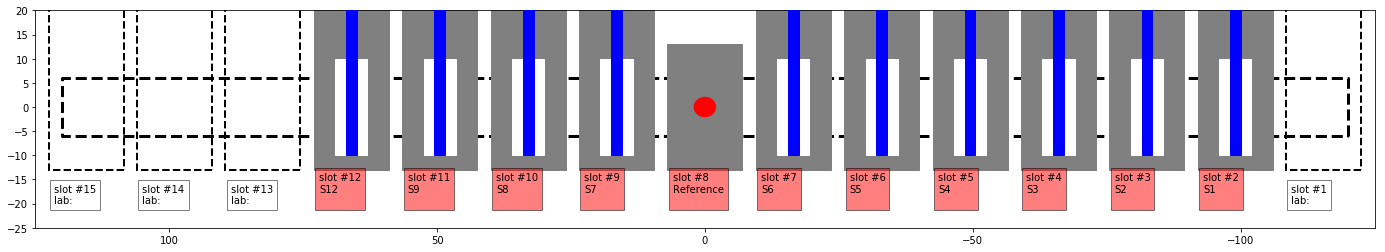

In [121]:
png_name= 'Data_Acquistion_Plot_2019_514'  #please change the filename here
acq_dict, dastr = multi_slot_report2(multi_sample, png_name= png_name )

In [ ]:
#%run -i debug_dataacq.py

# add data acquisition dictionary to database:

In [122]:
obid = data_acquisition_dictionary_to_database(acq_dict)

Add dictonary to database for data acquisition? yes/no: yes

Information successfully added to data acquisition database!
New database key added: 5cdb0c74f4fa2d46d7846f58


In [123]:
obid

ObjectId('5cdb0c74f4fa2d46d7846f58')

In [ ]:
# how to check the obid 
if False:
    data_acq_dict=data_acquisition_collection.find_one({'_id': obid }) 
    data_acq_dict

# Attach the data aquistion plot into olog book

In [ ]:
%run /home/yuzhang/pyCHX_link/pyCHX/chx_olog.py

In [ ]:
#obid =  ObjectId('5bbf8d8d412c2745ca4378e1')

In [ ]:
str(obid)

In [ ]:
text =  "ObjectId('%s')"%( str(obid)    )
logid = create_olog_entry( 'Data acquisition ID: %s'%text )

In [ ]:
filename= '/XF11ID/analysis/Olog_attachments/' + '%s.png'%png_name
update_olog_logid_with_file( logid = logid, text= dastr, filename = filename)

# Fix some problems prior to / after adding dictionary to database:
1) missing / insufficient sampling grid:

In [ ]:
# copied from error displayed in Report:
add_sampling_grid(ObjectId('5b8ae5067fd7d080b86a9ba9'),interactive=True)

2) adding some label to the sample information:

In [ ]:
update_label_method(ObjectId('5b8ae5067fd7d080b86a9ba9'),interactive=True)

# End